In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicLight') # For Windows
print(plt.rcParams['font.family'])
import json  
import cv2
import numpy as np

['NanumGothicLight']


In [2]:
def show_img(data, path, face):    
    img_array = np.fromfile(path, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    # img = cv2.imread(path, cv2.IMREAD_COLOR)    
    drawing_image = img.copy()
    plt.imshow(cv2.cvtColor(drawing_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.savefig('../data/image_analysis/imagesave/'+face+'facepic.jpg', facecolor='#ffffff', bbox_inches='tight')
    plt.show()

In [3]:
def show_flow(emo, order, face):
    plt.rc('ytick', labelsize=17)  # y축 눈금 폰트 크기
    plt.rc('xtick', labelsize=17)  # x축 눈금 폰트 크기 
    plt.rc('legend', fontsize=17)  # 범례 폰트 크기
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(len(emotion[emo]), 1, figsize = (20,20))
    # plt.suptitle(face)
    for idx in range(len(emotion[emo])):
        target_list = [i[0].replace('-',' - ') + " -> " + i[1].replace('-', ' - ') for i in emotion[emo][idx]['landmark_pair']]
        temp_plot = sns.lineplot(data = df[target_list], markers=False, dashes=False, ax=ax[idx], palette="tab10")        
        ax[idx].axvline(order, 0, 1, color='red', linestyle='--', linewidth=2)
        temp_plot.set_title(emotion[emo][idx]['name'], fontsize=30)
    plt.savefig('../data/image_analysis/imagesave/'+face+'.jpg', facecolor='#ffffff', bbox_inches='tight')
    plt.show()

In [103]:
with open('../data/image_analysis/emotion_rule.json', 'r') as f:
    json_data = json.load(f)
rule = json_data
df = pd.read_clipboard()
df['alpha'] = df['alpha'].astype('str')

In [107]:
output = []
#감정표정 종류
start = 0
for i in json_data:
    #표정 종류
    idx = 0
    for j in json_data[i]:
        # #pair
        # for la in j['landmark_pair']:
        end = len(j['landmark_pair'])
        # print(df[start:start+end])
        # print(start, start+end)
        rule[i][idx]['landmark_pair'] = df[start:start+end].to_dict('records')
        idx += 1
        start = start+end

In [108]:
with open('../data/image_analysis/emotion_rule_weight.json', 'w', encoding='utf-8') as make_file:
    json.dump(rule, make_file, indent="\t")

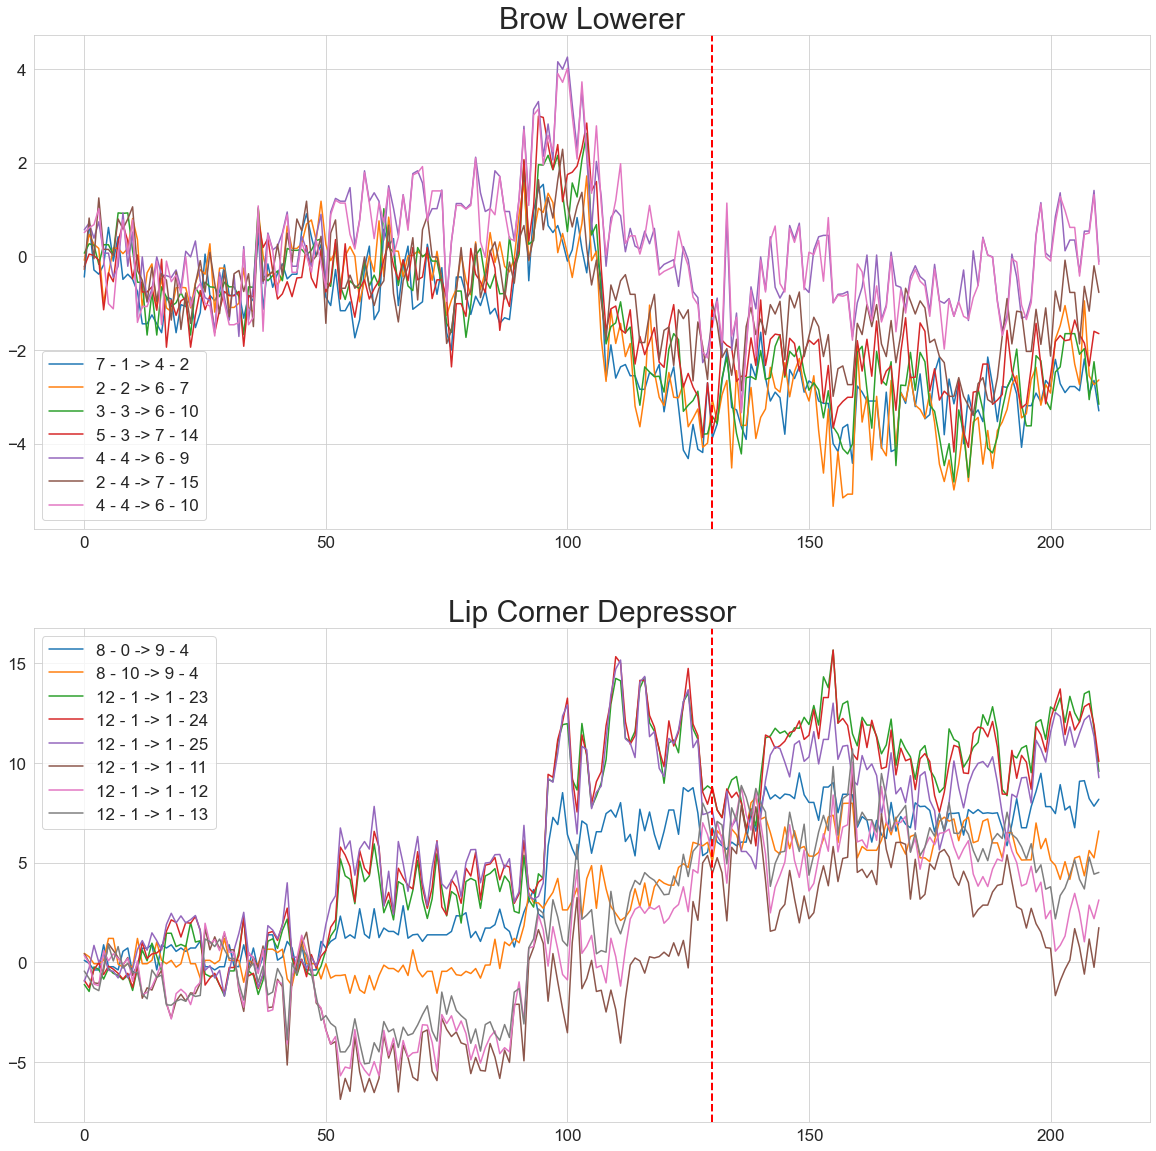

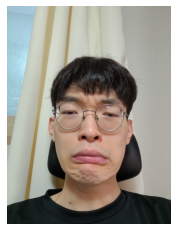

{'7 - 1 -> 4 - 2': -3.88, '2 - 2 -> 6 - 7': -3.06, '3 - 3 -> 6 - 10': -3.42, '5 - 3 -> 7 - 14': -3.76, '4 - 4 -> 6 - 9': -1.39, '2 - 4 -> 7 - 15': -0.99, '4 - 4 -> 6 - 10': -1.5, '8 - 0 -> 9 - 4': 6.75, '8 - 10 -> 9 - 4': 5.05, '12 - 1 -> 1 - 23': 8.67, '12 - 1 -> 1 - 24': 8.79, '12 - 1 -> 1 - 25': 7.6, '12 - 1 -> 1 - 11': 4.46, '12 - 1 -> 1 - 12': 5.45, '12 - 1 -> 1 - 13': 5.88}


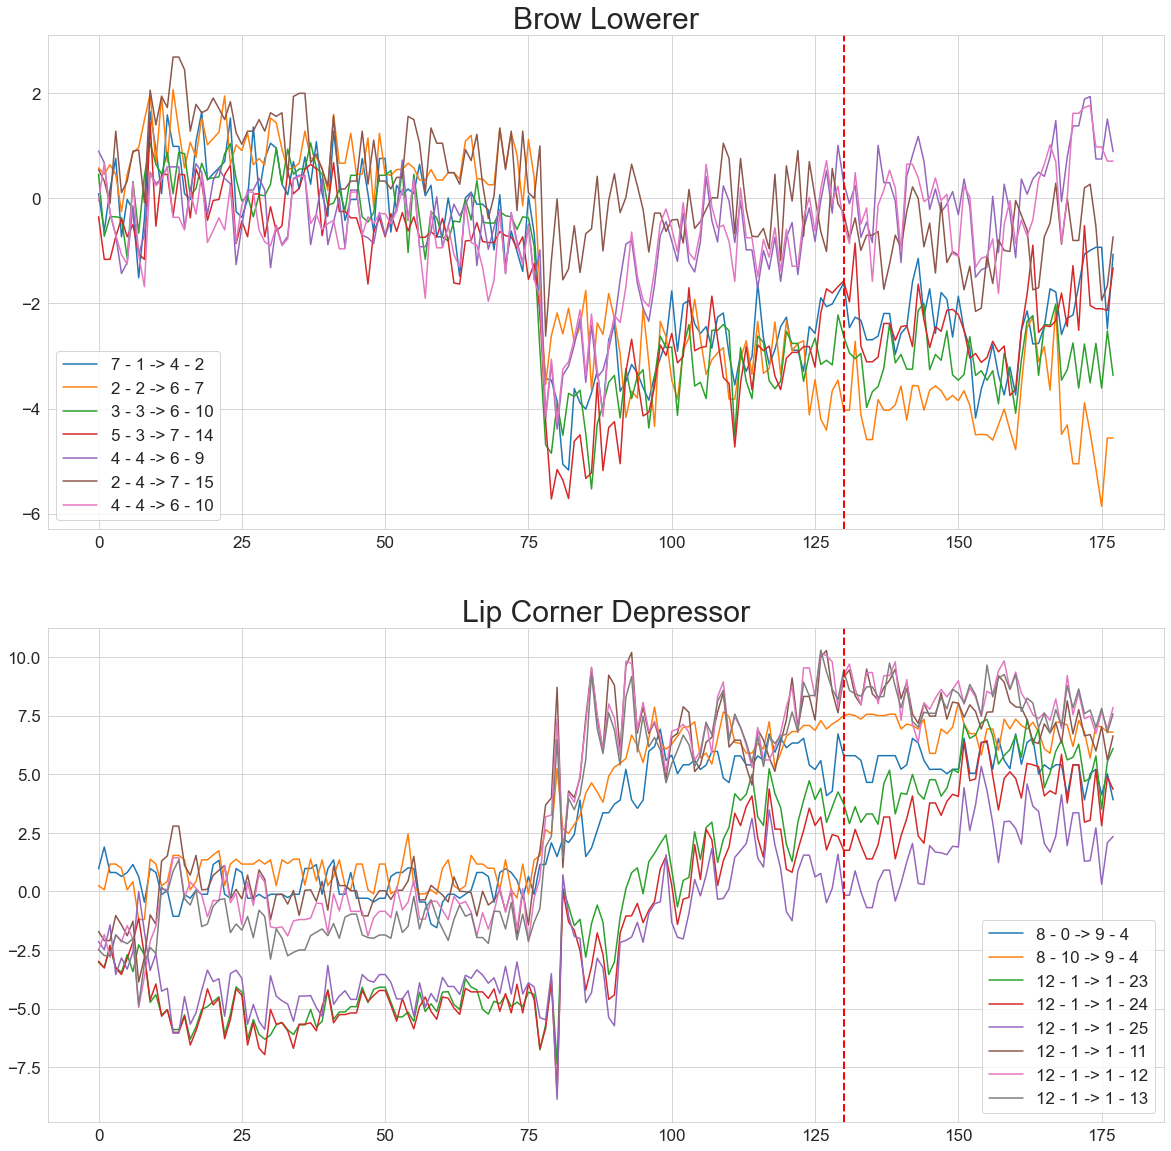

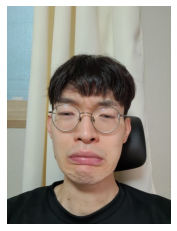

{'7 - 1 -> 4 - 2': -1.61, '2 - 2 -> 6 - 7': -4.03, '3 - 3 -> 6 - 10': -2.62, '5 - 3 -> 7 - 14': -1.57, '4 - 4 -> 6 - 9': 0.3, '2 - 4 -> 7 - 15': -0.28, '4 - 4 -> 6 - 10': -0.47, '8 - 0 -> 9 - 4': 5.8, '8 - 10 -> 9 - 4': 7.51, '12 - 1 -> 1 - 23': 3.75, '12 - 1 -> 1 - 24': 1.76, '12 - 1 -> 1 - 25': -0.16, '12 - 1 -> 1 - 11': 9.15, '12 - 1 -> 1 - 12': 9.25, '12 - 1 -> 1 - 13': 9.44}


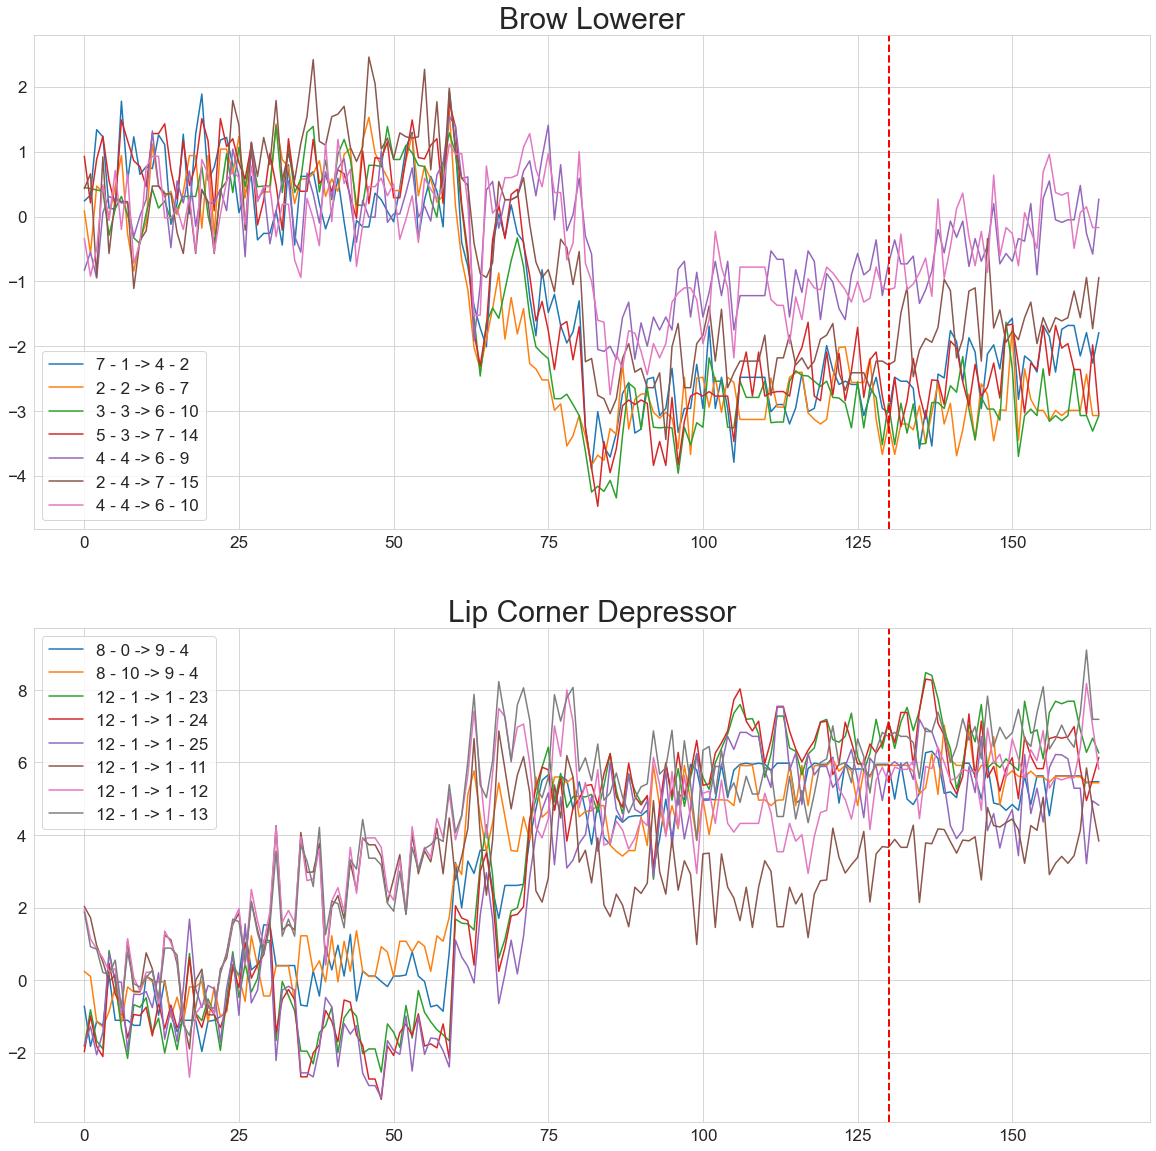

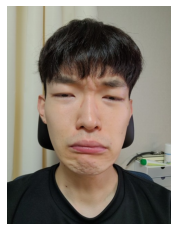

{'7 - 1 -> 4 - 2': -3.02, '2 - 2 -> 6 - 7': -3.2, '3 - 3 -> 6 - 10': -2.88, '5 - 3 -> 7 - 14': -3.24, '4 - 4 -> 6 - 9': -0.73, '2 - 4 -> 7 - 15': -2.29, '4 - 4 -> 6 - 10': -1.13, '8 - 0 -> 9 - 4': 5.95, '8 - 10 -> 9 - 4': 5.92, '12 - 1 -> 1 - 23': 7.12, '12 - 1 -> 1 - 24': 7.11, '12 - 1 -> 1 - 25': 5.89, '12 - 1 -> 1 - 11': 3.66, '12 - 1 -> 1 - 12': 5.45, '12 - 1 -> 1 - 13': 6.72}


In [16]:
# Happy, Sadness, Surprise, Anger
emo = {'웃기':'Happy',
        '슬픔': 'Sadness',
        '놀람': 'Surprise',
        '화남': 'Anger'}
people_list = ['뉴나', '뉴2나', '뉴3나']
emo_kr = '슬픔'
image_order = 130

for fa in people_list:
    face = fa + emo_kr
    df = pd.read_csv('../data/image_analysis/'+face+'/'+face+'.csv')
    with open('../data/image_analysis/emotion_rule.json', 'r') as f:
        emotion = json.load(f)
    show_flow(emo[emo_kr], image_order, face)
    show_img(df, '../data/image_analysis/'+face+'/' + str(image_order) + '.jpg', face)
    print(pd.DataFrame(df.iloc[image_order]).to_dict()[image_order])